# File Operations

Use the open() function to read(r), append (a), or write (w) to a file. Opening a file returns a file handle, not the actual data in the file. After opening the file you can read or write to it. When you are finished with the file, ensure it is closed. Failing to close a file may lead to memory issues, inaccessible files, and possibly data loss.

In [ ]:
%ls demofile.txt 

In [ ]:
# use the os module to access operating system information such as the current working directory (getcwd())
import os

# Create (or overwrite) a file
# If no path is specified, the file will be created in the current working directory

# If the file exists, opening with the "w" parameter will overwrite a file of the same name
#   if present in the same folder. To append instead of overwriting, use the "a" mode.
f = open("demofile.txt", "w")

f.write("This is the first line of the file.\n")

# Be sure to close your file. Failure to do so will cause problems.
f.close()

# Get the current directory
print(os.getcwd())

In [ ]:
%cat demofile.txt

## Using the With statement for opening files
One advantage to using the With statement is that files you open using this method are automatically closed.

In [ ]:
# Append the file
with open("demofile.txt", "a") as f:
    f.write("This is the second line.\n")

    # No need to explicitly close the file. Close() is automatically called.

In [ ]:
%cat demofile.txt

/home/documents/../../

## Using pathlib
Handling files and folders programmatically can be really difficult. You may need to locate and work with all files with a particular extension, recursively process folders, identify the parent folder of a file or folder, and so on. One of the most powerful modules for file and folder management is pathlib.

As the name implies, pathlib creates paths. It provides an object-oriented approach to handle file system path and file operations.

Some of the things you can do:
1. Create a path object representing a file or a directory path. This enables you to check if it exists, create it if not, find the parent directory, etc.
2. Perform path operations regardless of platform. Windows, Linux, and Mac have differences in their file systems. Pathlib helps provide a consistent interface across platforms and does not require the developer to query the underlying file system or operating system when performing file system operations.
3. Path manipulation: join paths, resolve paths, or normalize paths (aka convert a ".." into an absolute path).
4. File manipulation: you can also read files, write files, list directory contents, and check file permissions.

[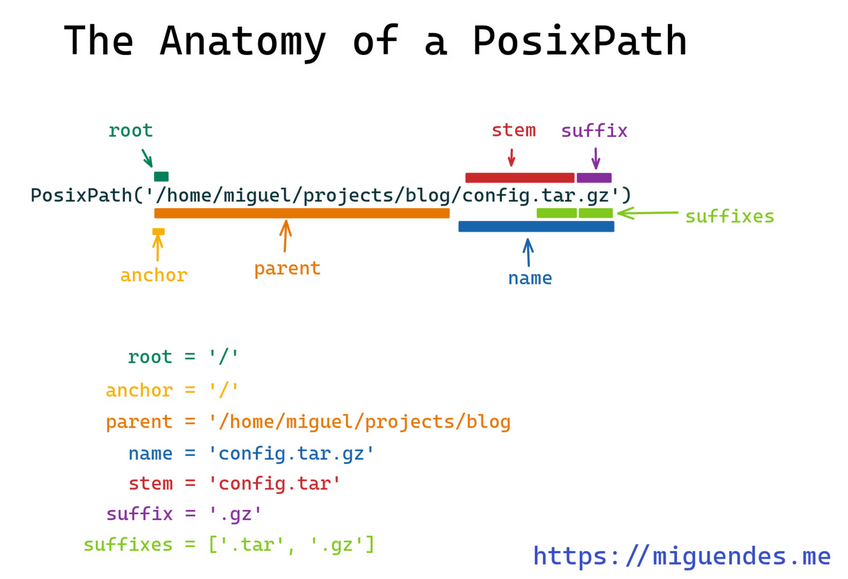

https://miguendes.me/python-pathlib is an excellent site for ```pathlib``` examples.

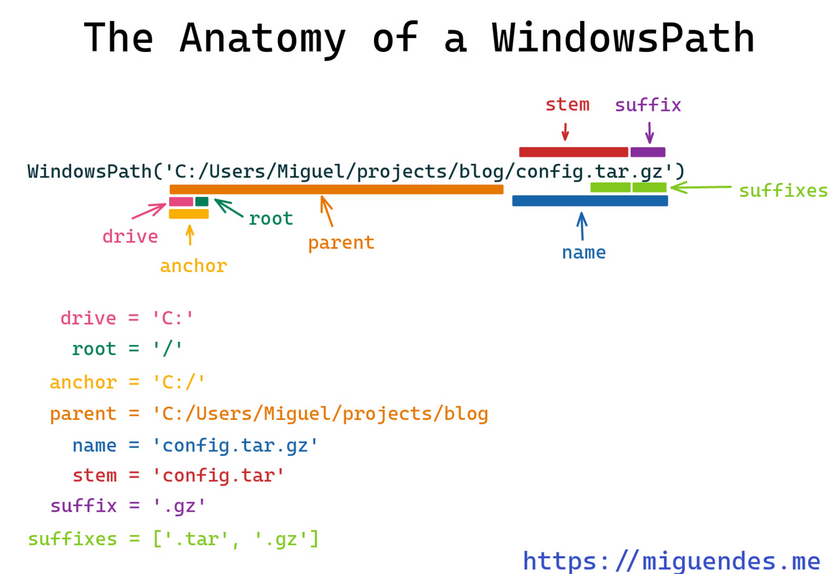

### Get the current working directory

In [4]:
import pathlib
my_path = pathlib.Path.cwd()
print(my_path.name)

Python_For_Business_Students


In [5]:
my_path.parent

PosixPath('/home/gjbott/Dropbox/research/github/gregbott')

In [6]:
my_path.drive

''

In [8]:
# recursively list all files and directories
my_files_dirs = my_path.iterdir() # iterdir() returns a generator
my_files_dirs

<generator object Path.iterdir at 0x7fa7702dc4a0>

In [ ]:
# recursively list all files and directories
my_files_dirs = list(my_path.iterdir()) # iterdir() returns a generator, convert to a list
my_files_dirs

In [13]:
my_files_dirs[10].name

'info.json'

In [14]:
my_files_dirs[10].suffix # use suffixes when more than one (e.g., compressed file 'tar.gz')

'.json'

In [15]:
my_files_dirs[10].stem

'info'

### Get the home folder
The pathlib module provides an easy way to locate the user's home folder. 

In [16]:
# Get the home folder for the current user
home_path = pathlib.Path.home()
print(home_path)

/home/gjbott


Finding all files of a particular type is accomplished by using Pathlib and the glob (global) module. 

In [3]:
ofc_dropbox_path = pathlib.Path('/mnt/internal-data/Dropbox')

In [ ]:
def show_tree(directory):
    print(f'+ {directory}')
    
    # Limited to Python notebooks
    for path in sorted(directory.rglob('*.ipynb')):
        depth = len(path.relative_to(directory).parts)
        indent = '    ' * depth
        print(f'{'  '} + {path.relative_to(directory).parts}')

In [ ]:
show_tree(ofc_dropbox_path)

## Checking if Path exists and creating a folder

```Python
parents = True
```
creates all folders in the path as needed.

```Python
exist_ok = False
```
by default, raises FileExistsError if the target directory already exists.

In [24]:
all_py_files = pathlib.Path.home().rglob('*.py')

In [25]:
all_py_files = [file.name for file in all_py_files]

In [26]:
len(all_py_files)

132778

In [27]:
all_py_files[:50]

['new_file.py',
 'from scapy.py',
 'dropbox.py',
 'Untitled.py',
 'dropbox(1).py',
 'proto_builder.py',
 'wrappers_pb2.py',
 'descriptor_database.py',
 'duration_pb2.py',
 'service_reflection.py',
 'descriptor_pb2.py',
 'descriptor.py',
 'field_mask_pb2.py',
 'message.py',
 'reflection.py',
 '__init__.py',
 'service.py',
 'type_pb2.py',
 'json_format.py',
 'unknown_fields.py',
 'message_factory.py',
 'timestamp_pb2.py',
 'struct_pb2.py',
 'source_context_pb2.py',
 'text_encoding.py',
 'any_pb2.py',
 'symbol_database.py',
 'empty_pb2.py',
 'api_pb2.py',
 'text_format.py',
 'descriptor_pool.py',
 '__init__.py',
 '__init__.py',
 'plugin_pb2.py',
 '__init__.py',
 'cpp_message.py',
 'field_mask.py',
 'wire_format.py',
 'extension_dict.py',
 'python_message.py',
 'encoder.py',
 'builder.py',
 'well_known_types.py',
 'containers.py',
 'enum_type_wrapper.py',
 '__init__.py',
 'type_checkers.py',
 'decoder.py',
 'testing_refleaks.py',
 'message_listener.py']

In [28]:
# Create a directory in the current working directory
pathlib.Path.cwd().joinpath('HW101').mkdir()

In [29]:
# ERROR: Attempt to create a directory when it already exists
pathlib.Path.cwd().joinpath('HW101').mkdir()

FileExistsError: [Errno 17] File exists: '/home/gjbott/Dropbox/research/github/gregbott/Python_For_Business_Students/HW101'

In [31]:
if pathlib.Path.cwd().joinpath('HW101').exists():
    hw_path = pathlib.Path.cwd().joinpath('HW101').exists()
    print("did not create directory--already exists!")
else:
    pathlib.Path.cwd().joinpath('HW101').mkdir()
    print("created directory")

did not create directory--already exists!


In [32]:
# This can be accomplished in a single line
#     'parents=True' - create the parent folder(s) if they don't exist. Default is 'False', which raises an error if parent doesn't exist
pathlib.Path.cwd().joinpath('HW102').mkdir(parents=True, exist_ok=True)

In [30]:
# Another way to create a path
folder_name = "HW101"
hw_path = pathlib.Path.cwd().joinpath(folder_name).exists()
try:
    pathlib.Path.cwd().joinpath(folder_name).mkdir()
except FileExistsError:
    print(f'{folder_name} exists.')
else:
    print(f'{folder_name} created.')

HW101 exists.


## Reading files
There are several ways to read data from a file. Some of the methods to read a file include: reading a specified number of characters, reading line-by-line, or a reading number of lines.

### Reading an entire file

In [ ]:
import pathlib

In [ ]:
gettysburg_txt = pathlib.Path('files/gettysburg.txt')
gettysburg_txt.read_text() # Displays line characters, store in variable then print to process escape characters

In [ ]:
getty_content = gettysburg_txt.read_text()
print(getty_content)

In [ ]:
with open(file_path,"r") as fh_getty:
    n = 100
    #read() will access the entire file. Not a good option for large files.
    print(fh_getty.read(n)) # Read the first n characters

In [ ]:
with open(file_path,"r") as fh_getty:    
    #read() will access the entire file. Not a good option for large files.
    print(fh_getty.readline()) # Read a line
    print(fh_getty.readline()) # Read a line
    print(fh_getty.readline()) # Read a line

You can also use the built-in file functions of Python to read files.

In [ ]:
with open(file_path,"r") as fh_getty:    
    #read() will access the entire file. Not a good option for large files.
    x = fh_getty.readlines() # Read all lines with new line characters, separated by commas
    print(x[5])

In [ ]:
with open(file_path,"r") as fh_getty:
    line_number = 0
    for x in fh_getty: # "x" represents a line
        print(str(line_number) + ": " + x)
        line_number += 1

In [ ]:
customer_file = pathlib.Path(r'files/fake_customer_list.txt')
with open(customer_file, 'r') as fh_customers:

    for line in fh_customers:
        #print(line)
        customer_list = line.strip().split("|")
        full_name = customer_list[0]
        email = customer_list[-1]
        print(full_name + " -- " + email)        

In [ ]:
# List files in the current directory 
import os
import pprint as pp # 'pretty prints' the output in a column
pp.pprint(os.listdir(os.getcwd()))

In [ ]:
# 'Magic' command to list files in current directory
%ls

### Use the CSV module to read a file

In [ ]:
ms_store = pathlib.Path('files/Microsoft_Store.csv')

In [ ]:
import pprint as pp
import csv

with open(ms_store, 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)

In [ ]:
pp.pprint(your_list[:99])

In [ ]:
len(your_list)

In [ ]:
import pandas as pd
df_lyrics = pd.DataFrame(your_list, columns=your_list[0])

In [ ]:
print(df_lyrics.shape)
with pd.option_context('display.max_seq_items', None):
    print(df_lyrics.head(5000))


In [ ]:
print(your_list[0])

## Writing to a File

## Use Pandas to Read a file
Although built-in file operations in Python may be useful for trivial matters, Pandas and Numpy are much more effective for reading, shaping, and analyzing data. Using these libraries is beyond the scope of this course, however, you should be aware of these libraries. See the Pandas notebook for more information.

In [ ]:
import pathlib

In [ ]:
import pandas as pd
file_path = pathlib.Path('files/2017_instacart_products.csv.gz')
df = pd.read_csv(file_path)
df.head()

In [ ]:
# Use the describe function to display descriptive statistics for numerical fields (even if that doesn't make sense...)
df.describe()